# Library Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Content
// TODO: merge

# Data Loading and Preprocessing
<a id="data-loading-and-preprocessing"></a>


In [4]:
paths_df = pd.read_csv("data/wikispeedia_paths-and-graph/paths_finished.tsv", sep="\t", comment='#', header=None,
                       names=["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"])

In [5]:
links_df = pd.read_csv('data/wikispeedia_paths-and-graph/links.tsv', sep='\t', comment='#', header=None, names=['origin', 'destination'])
# Create directed graph
G = nx.from_pandas_edgelist(links_df, source='origin', target='destination', create_using=nx.DiGraph())

# Exploratory Data Analysis
<a id="exploratory-data-analysis"></a>

## Path Length Analysis
<a id="path-length-analysis"></a>

In [6]:
# Calculate path length
paths_df["path_length"] = paths_df["path"].apply(lambda x: len(x.split(';')))

print("Average corrected path length:", paths_df["path_length"].mean())
print("Corrected path length distribution:\n", paths_df["path_length"].value_counts())

Average corrected path length: 6.757434038738844
Corrected path length distribution:
 path_length
5     10941
4      8558
6      8137
7      5868
8      3954
      ...  
72        1
86        1
71        1
66        1
69        1
Name: count, Length: 79, dtype: int64


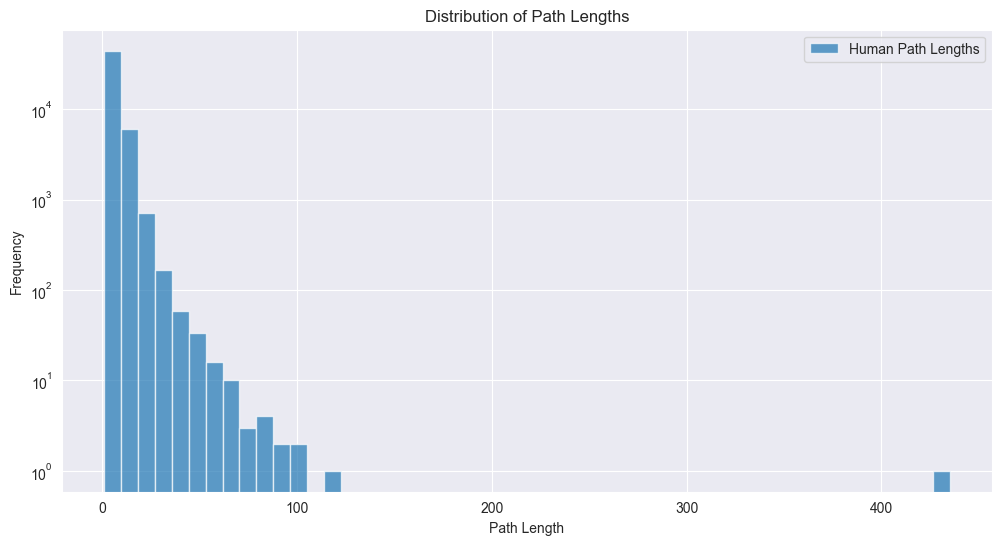

In [7]:
plt.figure(figsize=(12, 6))

# Plot human path lengths
plt.hist(paths_df["path_length"].dropna(), bins=50, alpha=0.7, label='Human Path Lengths')

# Add labels and title
plt.xlabel("Path Length")
plt.ylabel("Frequency")
plt.yscale("log")
plt.title("Distribution of Path Lengths")
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [8]:
# Get the optimal path length
shortest_path_matrix = dict(nx.all_pairs_shortest_path_length(G))

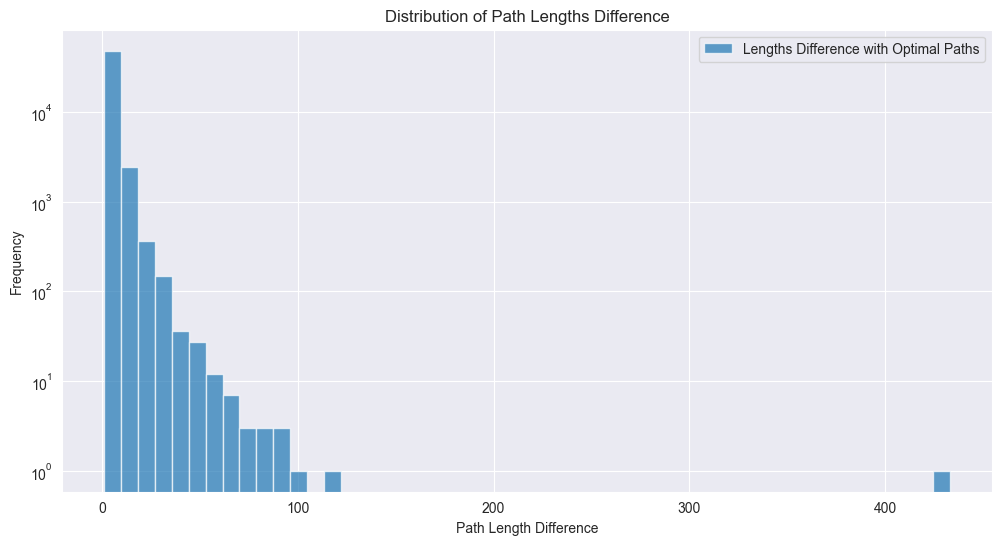

In [10]:
def calculate_shortest_path_length(path):
    articles = path.split(';')
    start_article = articles[0]
    end_article = articles[-1]
    if start_article != end_article:
        try:
            return shortest_path_matrix[start_article][end_article]
        except KeyError:
            return np.nan
    return 0

paths_df["shortest_path_length"] = paths_df["path"].apply(calculate_shortest_path_length)
paths_df["path_length_difference"] = paths_df["path_length"] - paths_df["shortest_path_length"]

plt.figure(figsize=(12, 6))

# Plot human path lengths
plt.hist(paths_df["path_length_difference"].dropna(), bins=50, alpha=0.7, label='Lengths Difference with Optimal Paths')

# Add labels and title
plt.xlabel("Path Length Difference")
plt.ylabel("Frequency")
plt.yscale("log")
plt.title("Distribution of Path Lengths Difference")
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Comparison with LLM
